# 

# <center> Decision Tree

## References

* Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow - Aurélien Géron
* Machine learning - Fast reference guide - Matt Harrison
* https://www.youtube.com/@patloeber
* https://www.youtube.com/@Dataquestio
* https://medium.com/turing-talks/turing-talks-17-modelos-de-predi%C3%A7%C3%A3o-decision-tree-610aa484cb05

## Overview

### Definition

A Decision Tree is a supervised learning model that can be used for both classification and regression.

The model consists of a series of rules and decisions applied to variables that act as a kind of filter applied to the data. At the end of this process, there will be a subset of the data from which predictions will be generated.

In the case of classification, the most common class will be the presented prediction. The prediction can also be presented as the probability/proportion of each class. In the case of regression, the prediction will be the average or median of the observed values in the resulting subset.

Conceptually, a decision tree consists of a root, branches, nodes, and leaves. The root and nodes are the variables to be evaluated, the branches are admissible values or paths to be followed in the decision-making process, while the leaves are the outputs.

To answer this question, the Decision Tree uses a method called Greedy Search. This method aims to identify the best rules that capture the relationship between input and output data, maximizing each step without considering the others. In other words, it seeks the best local solution rather than a global one. The method utilizes measures such as:

#### Entropy
* A measure of data uncertainty.
* Entropy varies between 0 and 1 and its function results in a concave parabolic curve with x ranging from 0 to 1. When the data distribution is 0.5, the entropy will be maximum. When the distribution is concentrated at 0 or 1, the entropy will be minimum.

#### Information Gain
* Reduction of entropy.
* The higher, the better.


#### Gini Criterion
* If we randomly select two items from a population, they must belong to the same class, and the probability of that is 1 if the population is pure;
* Probability that two random items belong to the same class;
* The lower, the better. The higher the concentration in a class, the lower the Gini criterion.

## Some Math

### Information Gain

#### $ entropy = -\sum_{i}^m p_{i}log_{2} p_{i} $
#### $ GI = entropy_{father} - \sum peso_{son} . entropy_{son} $


Onde:
####    $ peso = \frac{sample_{son}}{sample_{father}} $


### Gini Criterion

#### $ CG(D) = 1 - \sum_{i=1}^m p_{i}^2 $

Onde: 
   * $ D $ represents the data;
   * $ p $ is the probability of classes in D that belong to class $C_i$.

### Calculation Steps

* Select the best variable among all to start the tree
    * Calculate the Information Gain or Gini Index
    * Determine the best threshold in case of continuous variable
* Select the best variable among all to continue the tree
    * Calculate the Information Gain or Gini Index
    * Determine the best threshold in case of continuous variable
* Repeat the process until completing the tree
    * Until only one observation remains in the leaf, or
    * Until all observations are in one leaf, or
    * Until reaching the pre-established depth, or
    * Determine the minimum number of data points for a node, even if impure. Equivalent to defining the minimum acceptable entropy.

The definition of the threshold determines the split of data for continuous variables, in other words, it defines the rule of the node.

---

# Classifier

## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Data

In [2]:
# Imports
from sklearn import datasets

# Load data
bc = datasets.load_breast_cancer()

# Define X and y
X, y = bc.data, bc.target

# Separate train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## From Scratch

In [3]:
from my_DecisionTree import my_DecisionTreeClassifier, accuracy

In [4]:
# Define model
clf = my_DecisionTreeClassifier()

# Fit model
clf.fit(X_train, y_train)

# Predictions
predictions = clf.predict(X_test)

# Accurracy
acc = accuracy(predictions, y_test)
print("Accuracy: %.3f%%" % (acc * 100.0))

Accuracy: 91.230%


## From Sklearn

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [6]:
# Define model
clf = DecisionTreeClassifier()

# Fit model
clf.fit(X_train, y_train)

# Predictions
predictions = clf.predict(X_test)

#accuracy(predictions, y_test)
acc = clf.score(X_test, y_test)
print("Accuracy: %.3f%%" % (acc * 100.0))

Accuracy: 89.474%


In [7]:
# Define model
clf = DecisionTreeClassifier(max_depth = 2)

# Fit model
clf.fit(X_train, y_train)

# Predictions
predictions = clf.predict(X_test)

#accuracy(predictions, y_test)
acc = clf.score(X_test, y_test)
print("Accuracy: %.3f%%" % (acc * 100.0))

Accuracy: 91.228%


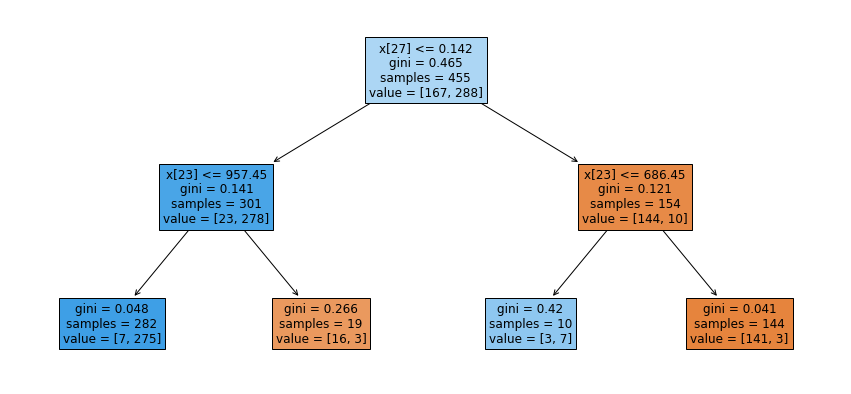

In [8]:
plt.figure(figsize=(15,7))
plot_tree(clf, filled=True, fontsize=12);

# Regressor

## Data

In [9]:
# Load data
url = "https://raw.githubusercontent.com/FernandoSartorGH/data/main/housing.csv"
df = pd.read_csv(url)

# Define X and y
X, y = df.iloc[:,0:-1], df.iloc[:,-1]

# Separate train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## From Scratch

In [10]:
from my_DecisionTree import my_DecisionTreeRegressor, accuracy

In [11]:
# ---

## From Sklearn

In [12]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [13]:
# Define model
reg = DecisionTreeRegressor()

# Fit model
reg.fit(X_train, y_train)

# Predictions
predictions = reg.predict(X_test)

# Accuracy
r2 = reg.score(X_test, y_test)
print("r2: %.3f%%" % (r2 * 100.0))

r2: 77.273%


In [14]:
# Define model
reg = DecisionTreeRegressor(max_depth=2)

# Fit model
reg.fit(X_train, y_train)

# Predictions
predictions = reg.predict(X_test)

# Accuracy
r2 = reg.score(X_test, y_test)
print("r2: %.3f%%" % (r2 * 100.0))

r2: 71.311%


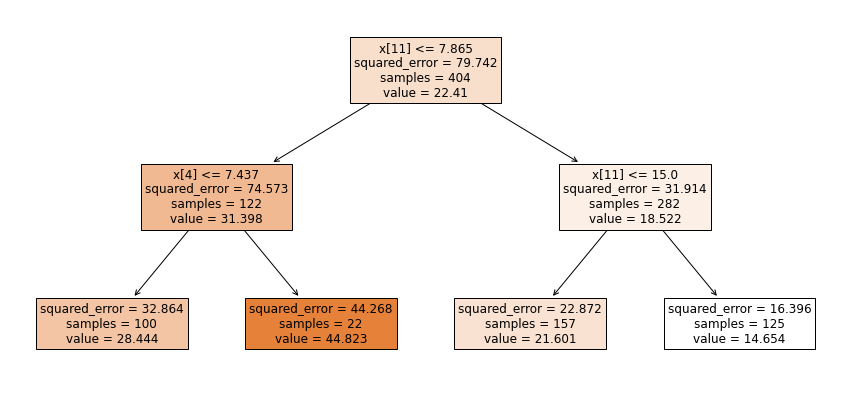

In [15]:
# PLot tree
plt.figure(figsize=(15,7))
plot_tree(reg, filled=True, fontsize=12);

___